<a href="https://colab.research.google.com/github/JSEFERINO/CURSO2024/blob/main/02_DCA_Ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Tema 1: Diseños Completos Aleatorizados - Ejemplo2**</span>
### **Problema:**
+ **La vida anaquel de las carnes almacenadas es el tiempo que un corte previamente empacado es sano, nutritivo y vendible. Un paquete normal expuesto al aire ambiental tiene una vida aproximada de 48 horas, después de las cuales la carne comienza a deteriorarse por contaminación de microbios, degeneración del color y encogimiento. El empaque al vacío es efectivo para suprimir el desarrollo de microbios; sinembargo, continúan siendo un problema los otros aspectos. Algunos estudios recientes sugieren las atmósferas controladas de gas, como alternativa a los empaques actuales. Dos atmósferas que prometen combinar la capacidad de suprimir el desarrollo de microbios con las conservación de las cualidades de la carne son:**

+ **Dióxido de carbono puro (CO₂)**
+ **Mezclas de monóxido de carbono (CO), oxígeno (O₂) y nitrogeno (N)**

+ **Hipótesis de la investigación. Con base en esta nueva información, el investigador plantea la hipótesis de que alguna forma de atmósfera controlada proporcionará un entorno mes efectivo de empaque para almacenamiento de la carne
Diseño del tratamiento. El diseño del tratamiento desarrollado por el investigador para evaluar la hipótesis incluyó empaques con:**
	- **A:=aire del ambiente con un empaque comercial de plástico;**
	- **B:=al vacío;**
	- **C:=una mezcla con gases con 1%C0, 40%O₂ y 59%N;**
	- **D:=100%CO₂**

+ Los empaque con el aire del ambiente y al vacío sirven como tratamientos de control, ya que ambos son estándares con cuya efectividad se puede comparar la de los nuevos empaques.
+ Se usó un diseño totalmente aleatorizado para el experimento. A cada conjunto de condiciones de empaque se le asignaron al azar 3 cortes del mismo tamaño (75 g). Cada corte se empacó por separado en las condiciones asignadas.
En este ejemplo se valúa la efectividad de cada tratamiento para suprimir el desarrollo bacterial.
+ Después de 9 días de almacenamiento a 4°C en una instalación normal, se midió el número de bacterias sicotrópicas en la carne.
+ Las bacterias sicotrópicas se encuentran en la superficie de la carne y se asocia con la carne deteriorada.

+ La variable de observación es el crecimiento bacterial el cual se expresa como el logaritmo del número de bacterias por centímetro cuadrado.



|Empaque |||	log(N°/cm²)
|:--:|:--:|:--:|:--:|
|A	|7.66	|6.98	|7.80
|B	|5.26	|5.44	|5.80
|C	|7.41	|7.33	|7.04
|D	|3.51	|2.91	|3.66



## **Paso_1. Ingresamos los datos manual**

In [5]:
import pandas as pd

# Datos proporcionados
crecimiento = [[7.66, 5.26, 7.41, 3.51],
            [6.98, 5.44, 7.33, 2.91],
            [7.80, 5.80, 7.04, 3.66]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(crecimiento, columns=columnas, index=filas)
Datos


,A,B,C,D
F1,7.66,5.26,7.41,3.51
F2,6.98,5.44,7.33,2.91
F3,7.80,5.80,7.04,3.66


# **Paso_2. Obtener resumen de estadísticas descriptivas**

In [6]:

# Obtener resumen de estadísticas descriptivas
summary_statistics = Datos.describe()

print(summary_statistics)


              A         B         C         D
count  3.000000  3.000000  3.000000  3.000000
mean   7.480000  5.500000  7.260000  3.360000
std    0.438634  0.274955  0.194679  0.396863
min    6.980000  5.260000  7.040000  2.910000
25%    7.320000  5.350000  7.185000  3.210000
50%    7.660000  5.440000  7.330000  3.510000
75%    7.730000  5.620000  7.370000  3.585000
max    7.800000  5.800000  7.410000  3.660000


# **Paso_3. Gráfico de medias por columna**

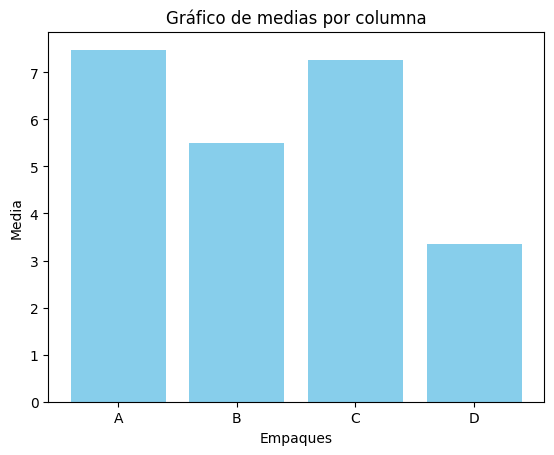

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular las medias por columna
medias_por_columna = Datos.mean()

# Crear el gráfico de barras
plt.bar(medias_por_columna.index, medias_por_columna.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Empaques')
plt.ylabel('Media')
plt.title('Gráfico de medias por columna')

# Mostrar el gráfico
plt.show()


# **Paso_4. Boxplot de los datos**

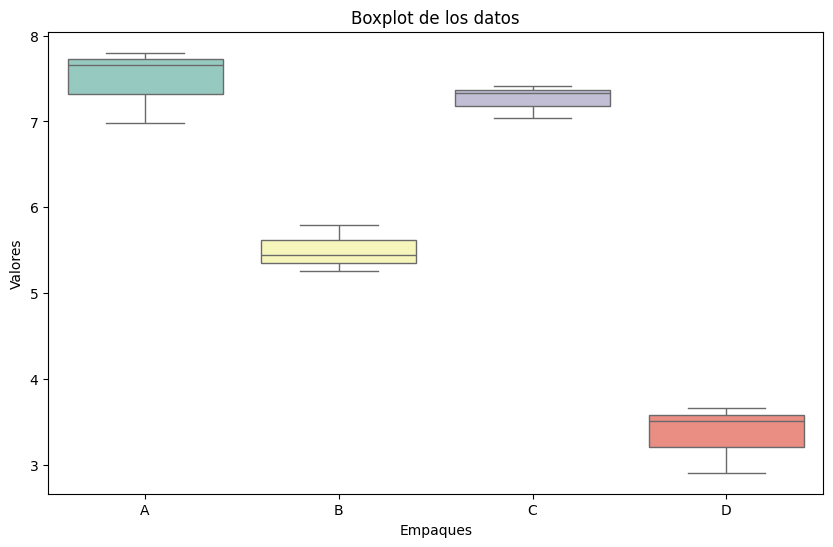

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos, palette='Set3')
plt.title('Boxplot de los datos')
plt.xlabel('Empaques')
plt.ylabel('Valores')
plt.show()


# **Paso_5. Tabla Anova**

In [10]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Datos proporcionados
crecimiento = [[7.66, 5.26, 7.41, 3.51],
            [6.98, 5.44, 7.33, 2.91],
            [7.80, 5.80, 7.04, 3.66]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(crecimiento, columns=columnas, index=filas)
Datos

# Preparar datos para ANOVA
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valor'})

# Aplicar ANOVA
modelo = ols('Valor ~ C(Columnas)', data=stacked_data).fit()
anova_resultados = anova_lm(modelo)

print(anova_resultados)


              df   sum_sq   mean_sq          F    PR(>F)
C(Columnas)  3.0  32.8728  10.95760  94.584376  0.000001
Residual     8.0   0.9268   0.11585        NaN       NaN


# **Paso_6. Graficos de Medias con intervalos de confianza de Tukey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B    -1.98 0.0005 -2.87 -1.09   True
     A      C    -0.22 0.8564 -1.11  0.67  False
     A      D    -4.12    0.0 -5.01 -3.23   True
     B      C     1.76  0.001  0.87  2.65   True
     B      D    -2.14 0.0003 -3.03 -1.25   True
     C      D     -3.9    0.0 -4.79 -3.01   True
------------------------------------------------


<ipython-input-11-c0f3d0df54f7>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Columnas', y='Valores', data=stacked_data, palette='Set3')
<ipython-input-11-c0f3d0df54f7>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')
<ipython-input-11-c0f3d0df54f7>:35: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')


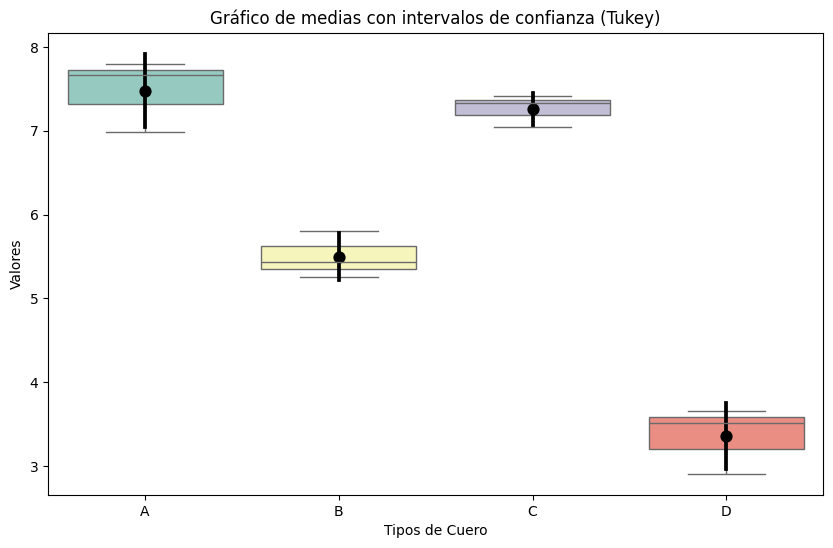

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Datos proporcionados
crecimiento = [[7.66, 5.26, 7.41, 3.51],
            [6.98, 5.44, 7.33, 2.91],
            [7.80, 5.80, 7.04, 3.66]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(crecimiento, columns=columnas, index=filas)
Datos

# Calcular las medias por columna
medias_por_columna = Datos.mean()

# Reshape de los datos para Tukey
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valores'})

# Realizar el test Tukey
tukey_results = pairwise_tukeyhsd(stacked_data['Valores'], stacked_data['Columnas'])

# Resumen del test Tukey
print(tukey_results)

# Visualización de las medias con intervalos de confianza
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columnas', y='Valores', data=stacked_data, palette='Set3')
sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')
plt.title('Gráfico de medias con intervalos de confianza (Tukey)')
plt.xlabel('Tipos de Cuero')
plt.ylabel('Valores')
plt.show()


# **Paso_8. Prueba de Homocedasticidad para residuos**

In [12]:
from scipy.stats import levene

#
# Datos proporcionados
crecimiento = [[7.66, 5.26, 7.41, 3.51],
            [6.98, 5.44, 7.33, 2.91],
            [7.80, 5.80, 7.04, 3.66]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(crecimiento, columns=columnas, index=filas)


# Convertir los datos en un formato adecuado para la prueba de Levene
datos_para_levene = [Datos[col].values for col in Datos.columns]

# Realizar la prueba de Levene
statistic, p_value = levene(*datos_para_levene)

# Imprimir los resultados
print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: No hay homogeneidad de varianzas.")
else:
    print("No se puede rechazar la hipótesis nula: Hay homogeneidad de varianzas.")


Estadística de Levene: 0.19878328197835168
Valor p: 0.8943359546334853
No se puede rechazar la hipótesis nula: Hay homogeneidad de varianzas.


# **Paso_8. Prueba Gráfica de Normalidad para residuos**

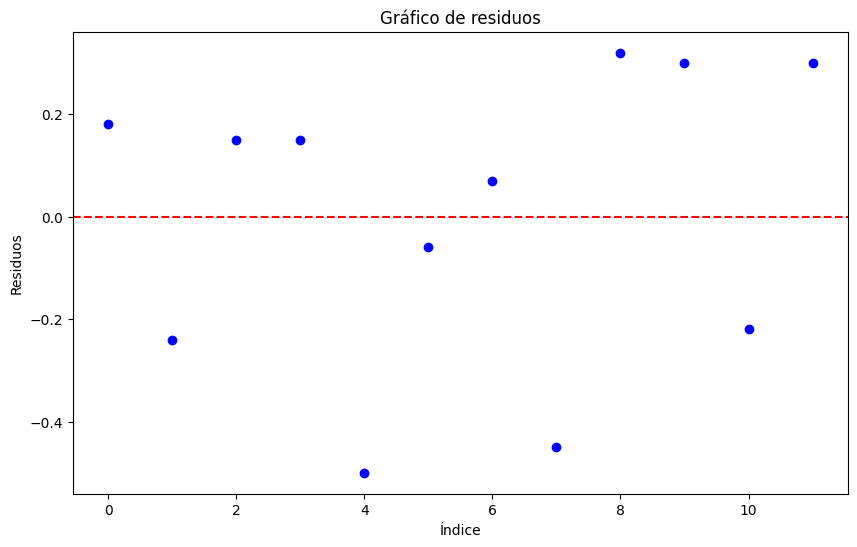

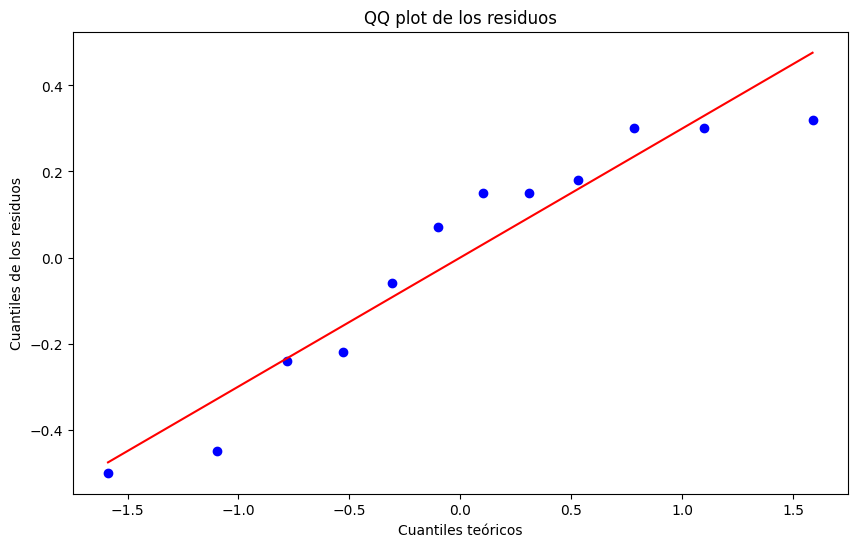

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot


# Datos proporcionados
crecimiento = [[7.66, 5.26, 7.41, 3.51],
            [6.98, 5.44, 7.33, 2.91],
            [7.80, 5.80, 7.04, 3.66]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(crecimiento, columns=columnas, index=filas)


# Convertir los datos en un formato adecuado para el análisis
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valor'})

# Ajustar un modelo lineal
modelo = sm.formula.ols('Valor ~ C(Columnas)', data=stacked_data).fit()

# Obtener los residuos
residuos = modelo.resid

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(residuos)), residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.show()

# Gráfico de probabilidad normal (QQ plot)
plt.figure(figsize=(10, 6))
probplot(residuos, dist="norm", plot=plt)
plt.title('QQ plot de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los residuos')
plt.show()


# **Paso_9. Prueba Analítica de Normalidad para residuos**

In [14]:
from scipy.stats import normaltest

# Realizar la prueba de normalidad de los residuos
statistic, p_value = normaltest(residuos)

# Imprimir los resultados
print("Estadística de la prueba de normalidad:", statistic)
print("Valor p:", p_value)

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Los residuos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los residuos siguen una distribución normal.")


Estadística de la prueba de normalidad: 1.7174557221695212
Valor p: 0.42370074582487893
No se puede rechazar la hipótesis nula: Los residuos siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##**Histograma de los datos originales**

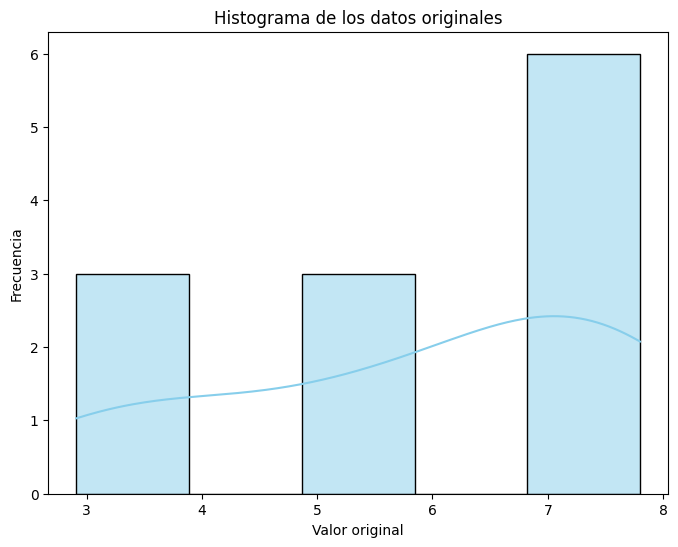

In [15]:
# Gráfico de los datos originales
plt.figure(figsize=(8, 6))
sns.histplot(stacked_data['Valor'], kde=True, color='skyblue')
plt.title('Histograma de los datos originales')
plt.xlabel('Valor original')
plt.ylabel('Frecuencia')
plt.show()


# **Paso_10. Prueba Analítica de Normalidad para residuos transformados**

+ Una forma común de transformar los datos para mejorar la normalidad es aplicar la transformación Box-Cox.
+ Sin embargo, es importante tener en cuenta que esta transformación solo es aplicable a datos estrictamente positivos.

+ Aquí te muestro cómo aplicar la transformación Box-Cox a tus datos y luego realizar la prueba de normalidad sobre los datos transformados:

+ Este código calculará la transformación Box-Cox de los datos y luego realizará la prueba de normalidad sobre los datos transformados.
+ Si el valor p de la prueba de normalidad transformada es menor que 0.05, se rechaza la hipótesis nula de que los datos transformados son normales.
+ De lo contrario, si el valor p es mayor o igual a 0.05, se asume que los datos transformados siguen una distribución normal.

In [16]:
from scipy.stats import boxcox
from scipy.stats import normaltest

# Aplicar la transformación Box-Cox a los datos
datos_transformados, lambda_value = boxcox(stacked_data['Valor'])

# Realizar la prueba de normalidad sobre los datos transformados
statistic_transformed, p_value_transformed = normaltest(datos_transformados)

# Imprimir los resultados
print("Estadística de la prueba de normalidad (transformada):", statistic_transformed)
print("Valor p (transformado):", p_value_transformed)

# Interpretar el resultado
alpha = 0.05
if p_value_transformed < alpha:
    print("Se rechaza la hipótesis nula: Los datos transformados no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos transformados siguen una distribución normal.")


Estadística de la prueba de normalidad (transformada): 3.000987718564232
Valor p (transformado): 0.2230199924536289
No se puede rechazar la hipótesis nula: Los datos transformados siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Este código creará un histograma de los datos transformados utilizando Seaborn, lo que te permitirá visualizar cómo se distribuyen los datos después de aplicar la transformación Box-Cox.**

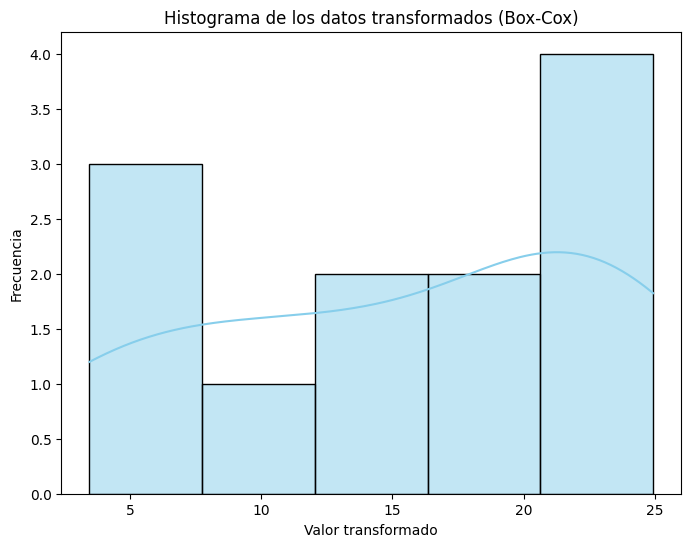

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame con los datos transformados
transformed_data = pd.DataFrame({'Valor': datos_transformados})

# Gráfico de los datos transformados
plt.figure(figsize=(8, 6))
sns.histplot(transformed_data['Valor'], kde=True, color='skyblue')
plt.title('Histograma de los datos transformados (Box-Cox)')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')
plt.show()


# **Conocimiento. La transformación Box-Cox**

+ La transformación Box-Cox es una técnica utilizada para estabilizar la varianza y hacer que los datos se ajusten mejor a una distribución normal.
+ Fue propuesta por los estadísticos George Box y Sir David Roxbee Cox.

+ La transformación Box-Cox está definida por la fórmula:


$$y^{(\lambda)} = \frac{y^{\lambda}-1}{{\lambda}}, \quad si \quad {\lambda}\neq 0 \quad ó \quad y^{(\lambda)} =log(y), \quad si \quad {\lambda}= 0$$

Donde:
+ $y$ es la variable original.
+ $λ$ es el parámetro de transformación, que puede tomar cualquier valor real.

+ La transformación Box-Cox se utiliza para encontrar el valor de λ que maximiza la verosimilitud de que los datos se ajusten a una distribución normal.

+ Esto se hace probando diferentes valores de λ y seleccionando el que maximiza la similitud con una distribución normal. Una vez que se determina el valor óptimo de λ, se aplica la transformación a los datos originales.

+ Es importante tener en cuenta que la transformación Box-Cox solo es aplicable a datos estrictamente positivos, ya que implica tomar el logaritmo de los datos.
+ Si los datos contienen ceros o valores negativos, se deben aplicar otras técnicas de transformación.


# **Paso_11. Prueba de Independencia**

+ Para verificar la independencia de los residuos, una forma común es realizar el análisis de los residuos para detectar cualquier patrón o estructura sistemática que pueda indicar dependencia entre ellos.
+ Esto se puede hacer visualmente mediante un gráfico de autocorrelación o un gráfico de residuos contra las variables explicativas.

+ Aquí te muestro cómo puedes hacer ambas:

## **a. Gráfico de Autocorrelación de los Residuos:**

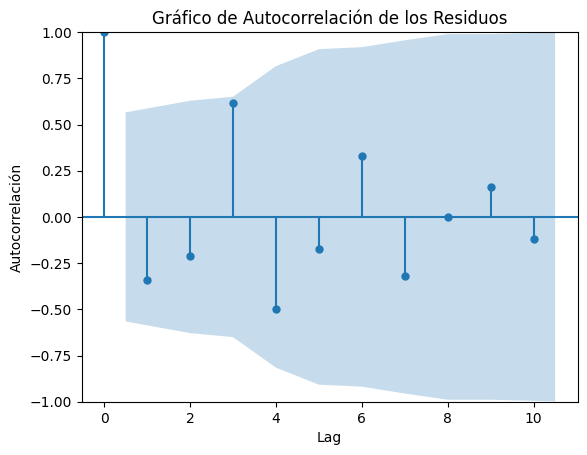

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de autocorrelación de los residuos
plot_acf(residuos, lags=10)
plt.title('Gráfico de Autocorrelación de los Residuos')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()


**Si hay dependencia entre los residuos, verás autocorrelaciones significativas en el gráfico.**

## **b. Gráfico de Residuos contra las Variables Explicativas:**

In [21]:
print(residuos)

0     0.18
1    -0.24
2     0.15
3     0.15
4    -0.50
5    -0.06
6     0.07
7    -0.45
8     0.32
9     0.30
10   -0.22
11    0.30
dtype: float64


## **c. Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**

In [23]:
## **c. Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
import pandas as pd

Empaques = (['A']*3+['B']*3+['C']*3+['D']*3)
Crecimiento = [7.66,	6.98,	7.80, 5.26,	5.44,	5.80, 7.41,	7.33,	7.04, 3.51,	2.91,	3.66]

Datos  = pd.DataFrame({'Empaques': Empaques, 'Crecimiento': Crecimiento})
Datos

,Empaques,Crecimiento
0,A,7.66
1,A,6.98
2,A,7.80
3,B,5.26
4,B,5.44
5,B,5.80
6,C,7.41
7,C,7.33
8,C,7.04
9,D,3.51


# **d. Gráfico de residuos contra las variables explicativas**

+ Si hay dependencia entre los residuos y las variables explicativas, verás algún patrón sistemático en los gráficos.

+ Además de estos métodos visuales, también puedes realizar pruebas estadísticas formales para verificar la independencia de los residuos, como la prueba de Durbin-Watson o la prueba de Ljung-Box.

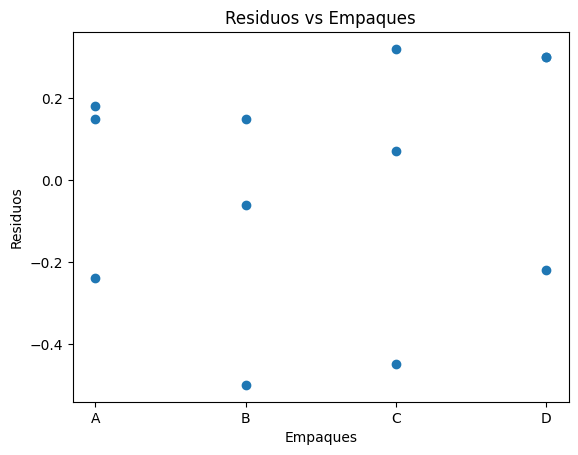

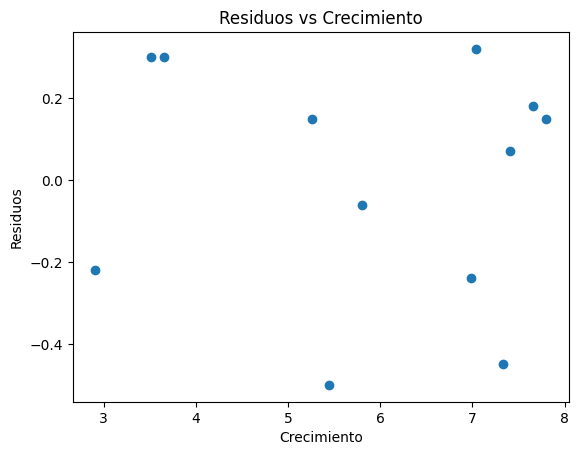

In [24]:
# Gráfico de residuos contra las variables explicativas
for col in Datos.columns:
    plt.scatter(Datos[col], residuos)
    plt.title(f'Residuos vs {col}')
    plt.xlabel(col)
    plt.ylabel('Residuos')
    plt.show()


##**Podemos asumir independencia si no encontramos un patrón claro en los gráficos de residuos contra el índice de observación o si la prueba de Durbin-Watson no indica autocorrelación.**

## **Paso_12. Prueba de Durbin-Watson**

In [25]:
from statsmodels.stats.stattools import durbin_watson

# Calcular la estadística de Durbin-Watson
durbin_watson_statistic = durbin_watson(residuos)

# Imprimir la estadística de Durbin-Watson
print("Estadística de Durbin-Watson:", durbin_watson_statistic)

# Interpretar la estadística de Durbin-Watson
if durbin_watson_statistic < 1.5:
    print("Indica autocorrelación positiva.")
elif durbin_watson_statistic > 2.5:
    print("Indica autocorrelación negativa.")
else:
    print("No indica autocorrelación significativa.")


Estadística de Durbin-Watson: 2.552870090634441
Indica autocorrelación negativa.


## **Explicación de la Prueba de Durbin Watson**
+ La prueba de Durbin-Watson es una prueba estadística utilizada para detectar la presencia de autocorrelación en los residuos de un modelo de regresión.
+ La autocorrelación en los residuos significa que los errores están correlacionados entre sí, lo que sugiere que el modelo no está capturando toda la información en los datos.

+ La prueba de Durbin-Watson produce un estadístico que tiene un valor entre 0 y 4.
+ Un valor de 2 indica que no hay autocorrelación en los residuos.
+ Los valores más cercanos a 0 indican autocorrelación positiva (los residuos suelen estar correlacionados positivamente entre sí)
+ Los valores más cercanos a 4 indican autocorrelación negativa (los residuos suelen estar correlacionados negativamente entre sí).

+ La interpretación del estadístico de Durbin-Watson es la siguiente:

  - Si el valor está cerca de 2, no hay autocorrelación significativa.
  - Si el valor es menor que 2, indica autocorrelación positiva.
  - Si el valor es mayor que 2, indica autocorrelación negativa.




